In [1040]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [1041]:
df=pd.read_csv('final.csv')

In [1042]:
df.head()

,gender,age,status,location,method,timeSpend,visitNo,income,membershipCard,promoRate,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
0,Female,20-29,Student,0,0,1,Monthly,0,0,5,...,3,1,1,1,1,1,1,1,1,0
1,Female,20-29,Student,1,2,0,Monthly,0,0,4,...,2,1,1,1,1,1,1,1,1,0
2,Male,20-29,Employed,2,0,1,Never,0,0,4,...,3,1,1,1,1,1,1,1,1,0
3,Female,20-29,Student,2,2,0,Monthly,0,1,4,...,3,1,1,1,1,1,1,1,1,1
4,Male,20-29,Student,1,2,1,Never,0,1,4,...,3,1,1,1,1,1,1,1,1,0


In [1043]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15742 entries, 0 to 15741
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  15742 non-null  object
 1   age                     15727 non-null  object
 2   status                  15717 non-null  object
 3   location                15742 non-null  int64 
 4   method                  15742 non-null  int64 
 5   timeSpend               15742 non-null  int64 
 6   visitNo                 15720 non-null  object
 7   income                  15742 non-null  int64 
 8   membershipCard          15742 non-null  int64 
 9   promoRate               15742 non-null  int64 
 10  itemPurchaseCoffee      15742 non-null  int64 
 11  itempurchaseCold        15742 non-null  int64 
 12  itemPurchasePastries    15742 non-null  int64 
 13  itemPurchaseJuices      15742 non-null  int64 
 14  itemPurchaseSandwiches  15742 non-null  int64 
 15  it

In [1044]:
df.isnull().sum()

gender                     0
age                       15
status                    25
location                   0
method                     0
timeSpend                  0
visitNo                   22
income                     0
membershipCard             0
promoRate                  0
itemPurchaseCoffee         0
itempurchaseCold           0
itemPurchasePastries       0
itemPurchaseJuices         0
itemPurchaseSandwiches     0
itemPurchaseOthers         0
spendPurchase              0
productRate                0
priceRate                  0
ambianceRate               0
wifiRate                   0
serviceRate                0
chooseRate                 0
promoMethodApp             0
promoMethodSoc             0
promoMethodEmail           0
promoMethodDeal            0
promoMethodFriend          0
promoMethodDisplay         0
promoMethodBillboard       0
promoMethodOthers          0
loyal                      0
dtype: int64

In [1045]:
df.nunique()
#we can see there are many columns having unique value 1, so its better we exclude them from our analysis

gender                    2
age                       4
status                    4
location                  3
method                    6
timeSpend                 5
visitNo                   4
income                    5
membershipCard            2
promoRate                 5
itemPurchaseCoffee        1
itempurchaseCold          1
itemPurchasePastries      1
itemPurchaseJuices        1
itemPurchaseSandwiches    1
itemPurchaseOthers        1
spendPurchase             4
productRate               5
priceRate                 5
ambianceRate              5
wifiRate                  5
serviceRate               4
chooseRate                5
promoMethodApp            1
promoMethodSoc            1
promoMethodEmail          1
promoMethodDeal           1
promoMethodFriend         1
promoMethodDisplay        1
promoMethodBillboard      1
promoMethodOthers         2
loyal                     2
dtype: int64

In [1046]:
df=df.drop(['itemPurchaseCoffee','itempurchaseCold', 'itemPurchasePastries','itemPurchaseJuices', 'itemPurchaseSandwiches', 'itemPurchaseOthers'
,'promoMethodApp','promoMethodSoc','promoMethodEmail', 'promoMethodDeal', 'promoMethodFriend', 'promoMethodDisplay', 'promoMethodBillboard'], axis=1)

In [1047]:
df.head()

,gender,age,status,location,method,timeSpend,visitNo,income,membershipCard,promoRate,spendPurchase,productRate,priceRate,ambianceRate,wifiRate,serviceRate,chooseRate,promoMethodOthers,loyal
0,Female,20-29,Student,0,0,1,Monthly,0,0,5,1,4,3,5,4,4,3,1,0
1,Female,20-29,Student,1,2,0,Monthly,0,0,4,1,4,3,4,4,5,2,1,0
2,Male,20-29,Employed,2,0,1,Never,0,0,4,1,4,3,4,4,4,3,1,0
3,Female,20-29,Student,2,2,0,Monthly,0,1,4,1,2,1,3,3,3,3,1,1
4,Male,20-29,Student,1,2,1,Never,0,1,4,2,3,3,2,2,3,3,1,0


In [1048]:
df.size

299098

In [1049]:
df.shape

(15742, 19)

In [1050]:
df.describe()

,location,method,timeSpend,income,membershipCard,promoRate,spendPurchase,productRate,priceRate,ambianceRate,wifiRate,serviceRate,chooseRate,promoMethodOthers,loyal
count,15742.000000,15742.000000,15742.000000,15742.000000,15742.000000,15742.000000,15742.000000,15742.000000,15742.000000,15742.000000,15742.000000,15742.000000,15742.000000,15742.000000,15742.000000
mean,1.048660,0.410939,0.203532,1.258544,0.344111,2.999301,1.111168,3.150997,2.329120,3.199022,2.785034,3.402236,2.840745,0.782112,0.096049
std,0.721789,0.701158,0.501436,1.466647,0.475093,1.419079,0.498614,0.797608,0.856068,0.780026,0.807521,0.632387,0.863233,0.412824,0.294667
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,0.000000
75%,2.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,1.000000,0.000000
max,2.000000,5.000000,4.000000,4.000000,1.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000


In [1051]:
df.isnull().sum()

gender                0
age                  15
status               25
location              0
method                0
timeSpend             0
visitNo              22
income                0
membershipCard        0
promoRate             0
spendPurchase         0
productRate           0
priceRate             0
ambianceRate          0
wifiRate              0
serviceRate           0
chooseRate            0
promoMethodOthers     0
loyal                 0
dtype: int64

# Let us treat missing values and then proceed with visualization

In [1052]:
df['age']=df['age'].fillna(df['age'].mode()[0])

In [1053]:
df['status']=df['status'].fillna(df['status'].mode()[0])

In [1054]:
df['visitNo']=df['visitNo'].fillna(df['visitNo'].mode()[0])

In [1055]:
df.isnull().sum()

gender               0
age                  0
status               0
location             0
method               0
timeSpend            0
visitNo              0
income               0
membershipCard       0
promoRate            0
spendPurchase        0
productRate          0
priceRate            0
ambianceRate         0
wifiRate             0
serviceRate          0
chooseRate           0
promoMethodOthers    0
loyal                0
dtype: int64

In [1056]:
df['age'].sort_values(ascending=True)

0        20-29
9671     20-29
9672     20-29
9673     20-29
9674     20-29
         ...  
10007      >40
10006      >40
10005      >40
10003      >40
2882       >40
Name: age, Length: 15742, dtype: object

In [1057]:
new=df['age'].sort_values(ascending=True)

In [1058]:
new=pd.DataFrame(new)

In [1059]:
new

,age
0,20-29
9671,20-29
9672,20-29
9673,20-29
9674,20-29
...,...
10007,>40
10006,>40
10005,>40
10003,>40


In [1060]:
new.reset_index()

,index,age
0,0,20-29
1,9671,20-29
2,9672,20-29
3,9673,20-29
4,9674,20-29
...,...,...
15737,10007,>40
15738,10006,>40
15739,10005,>40
15740,10003,>40


# **Data Visualization**

# Univariate

In [1061]:
age=df.groupby(['age']).size().reset_index().rename(columns={0:'count'})

In [1062]:
age

,age,count
0,20-29,5665
1,30-39,1201
2,<20,2035
3,>40,6841


In [1063]:
fig=px.bar(age,x='age', y='count')
fig.show()

In [1064]:
fig=px.bar(age,x='age', y='count',title='Age Distribution')
fig.show()


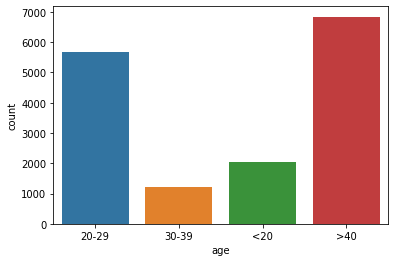

In [1065]:
sns.barplot(x='age', y='count', data=age)

In [1066]:
gender=df.groupby(['gender']).size().reset_index().rename(columns={0:'count'})

In [1067]:
gender

,gender,count
0,Female,5472
1,Male,10270


In [1068]:
plt.figure(figsize=(2,2)) #you cant change figure size in plotly
fig=px.pie(gender,values='count',names='gender')
fig.show()

<Figure size 144x144 with 0 Axes>

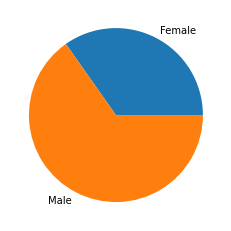

In [1069]:
plt.pie(data=gender, x='count', labels='gender')
plt.show()

In [1070]:
status=df.groupby(['status']).size().reset_index().rename(columns={0:'count'})

In [1071]:
status

,status,count
0,Employed,4446
1,Housewife,2
2,Self Employed,6325
3,Student,4969


In [1072]:
fig=px.funnel(status, x='count', y='status')
fig.show()

In [1073]:
fig=px.funnel_area(status, values='count', names='status')
fig.show()

In [1074]:
visit=df.groupby(['visitNo']).size().reset_index().rename(columns={0:'count'})

In [1075]:
visit

,visitNo,count
0,Daily,1094
1,Monthly,5821
2,Never,6198
3,Weekly,2629


In [1076]:
fig=px.line(visit,x='visitNo', y='count')
fig.show()

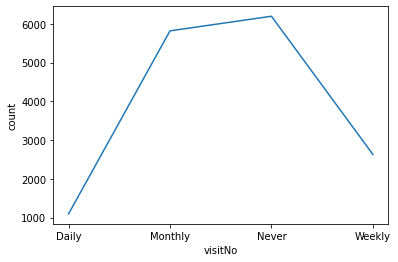

In [1077]:
sns.lineplot(x=visit['visitNo'], y=visit['count'])

# **Bivariate Analysis**

In [1078]:
b1=df.groupby(['gender','loyal']).size().reset_index().rename(columns={0:'counts'})

In [1079]:
b1

,gender,loyal,counts
0,Female,0,4652
1,Female,1,820
2,Male,0,9578
3,Male,1,692


In [1080]:
fig=px.bar(b1, x='gender',y='counts', color='loyal')
fig.show()

In [1081]:
fig=px.bar(b1, x='gender',y='counts', color='loyal', barmode='group') #since o and 1 are taken as numerical columns, you are getting stacked
fig.show()

In [1082]:
b2=df.groupby(['age','visitNo']).size().reset_index().rename(columns={0:'counts'})

In [1083]:
b2

,age,visitNo,counts
0,20-29,Daily,343
1,20-29,Monthly,3295
2,20-29,Never,1486
3,20-29,Weekly,541
4,30-39,Monthly,186
5,30-39,Never,807
6,30-39,Weekly,208
7,<20,Daily,699
8,<20,Monthly,799
9,<20,Never,426


In [1084]:
fig=px.line(b2, x='age', y='counts', color='visitNo')
fig.show()

In [1085]:
fig=px.line(b2, x='age', y='counts', color='visitNo', markers=True)
fig.show()

In [1086]:
b3=df.groupby(['age','visitNo'])['status'].size().reset_index().rename(columns={0:'counts'})
#no difference between the previous one and this one

In [1087]:
b3

,age,visitNo,status
0,20-29,Daily,343
1,20-29,Monthly,3295
2,20-29,Never,1486
3,20-29,Weekly,541
4,30-39,Monthly,186
5,30-39,Never,807
6,30-39,Weekly,208
7,<20,Daily,699
8,<20,Monthly,799
9,<20,Never,426


In [1088]:
b4=df.groupby(['age','visitNo', 'status']).size().reset_index().rename(columns={0:'counts'})

In [1089]:
b4

,age,visitNo,status,counts
0,20-29,Daily,Self Employed,334
1,20-29,Daily,Student,9
2,20-29,Monthly,Employed,978
3,20-29,Monthly,Housewife,1
4,20-29,Monthly,Self Employed,992
5,20-29,Monthly,Student,1324
6,20-29,Never,Employed,423
7,20-29,Never,Self Employed,772
8,20-29,Never,Student,291
9,20-29,Weekly,Employed,142


In [1090]:
fig=px.bar(b4, x='age', y='counts', color='visitNo', text='visitNo') #by defualt it will stacked plot
fig.show() #there are again lines the plot, because there is another variables and comibnations have repeated

In [1091]:
fig=px.bar(b4, x='age', y='counts', color='visitNo', barmode='group')
fig.show() #now you will get grouped bar chart

In [1092]:
fig=px.bar(b4, x='age', y='counts', color='status', barmode='group', text='visitNo')
fig.show()

In [1093]:
fig=px.bar(b4, x='age', y='counts', color='status', barmode='group',text_auto='.2s', text='visitNo')
fig.show()    #text auto will make the value correction

In [1094]:
abc=df.pivot_table(index=['age'], columns=['status'], values=['loyal'], aggfunc='mean')

In [1095]:
abc

loyal                                  
status  Employed Housewife Self Employed   Student
age                                               
20-29   0.226183       0.0      0.096677  0.199002
30-39   0.000000       0.0      0.000899       NaN
<20          NaN       NaN      0.086207  0.146952
>40     0.025577       NaN      0.011511  0.146870

In [1096]:
abc.reset_index()

age     loyal                                  
status         Employed Housewife Self Employed   Student
0       20-29  0.226183       0.0      0.096677  0.199002
1       30-39  0.000000       0.0      0.000899       NaN
2         <20       NaN       NaN      0.086207  0.146952
3         >40  0.025577       NaN      0.011511  0.146870

In [1097]:
cross=pd.crosstab(index=df['age'], columns=df['status'], values=df['loyal'], aggfunc='mean')

In [1098]:
cross

status,Employed,Housewife,Self Employed,Student
age,,,,
20-29,0.226183,0.0,0.096677,0.199002
30-39,0.000000,0.0,0.000899,NaN
<20,NaN,NaN,0.086207,0.146952
>40,0.025577,NaN,0.011511,0.146870


In [1099]:
b5=pd.crosstab(index=df['age'], columns=df['status'], values=df['loyal'], aggfunc='mean')

In [1100]:
b5

status,Employed,Housewife,Self Employed,Student
age,,,,
20-29,0.226183,0.0,0.096677,0.199002
30-39,0.000000,0.0,0.000899,NaN
<20,NaN,NaN,0.086207,0.146952
>40,0.025577,NaN,0.011511,0.146870


In [1101]:
b5.reset_index()   #there is no difference between pivot and cross tab
#for pivot, you need df, but for cross tab, you can do it df and lists also

status,age,Employed,Housewife,Self Employed,Student
0,20-29,0.226183,0.0,0.096677,0.199002
1,30-39,0.000000,0.0,0.000899,NaN
2,<20,NaN,NaN,0.086207,0.146952
3,>40,0.025577,NaN,0.011511,0.146870


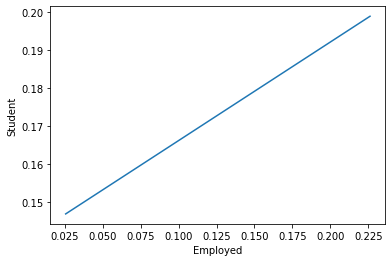

In [1102]:
sns.lineplot(x=b5['Employed'], y=b5['Student'])

# **Feature Engineeering**

In [1103]:
df.head()

,gender,age,status,location,method,timeSpend,visitNo,income,membershipCard,promoRate,spendPurchase,productRate,priceRate,ambianceRate,wifiRate,serviceRate,chooseRate,promoMethodOthers,loyal
0,Female,20-29,Student,0,0,1,Monthly,0,0,5,1,4,3,5,4,4,3,1,0
1,Female,20-29,Student,1,2,0,Monthly,0,0,4,1,4,3,4,4,5,2,1,0
2,Male,20-29,Employed,2,0,1,Never,0,0,4,1,4,3,4,4,4,3,1,0
3,Female,20-29,Student,2,2,0,Monthly,0,1,4,1,2,1,3,3,3,3,1,1
4,Male,20-29,Student,1,2,1,Never,0,1,4,2,3,3,2,2,3,3,1,0


In [1104]:
#first remove 'never' from 'visitNo' as it is not making any sense
df = df[df['visitNo'] != 'Never']

In [1105]:
df.head()

,gender,age,status,location,method,timeSpend,visitNo,income,membershipCard,promoRate,spendPurchase,productRate,priceRate,ambianceRate,wifiRate,serviceRate,chooseRate,promoMethodOthers,loyal
0,Female,20-29,Student,0,0,1,Monthly,0,0,5,1,4,3,5,4,4,3,1,0
1,Female,20-29,Student,1,2,0,Monthly,0,0,4,1,4,3,4,4,5,2,1,0
3,Female,20-29,Student,2,2,0,Monthly,0,1,4,1,2,1,3,3,3,3,1,1
5,Female,20-29,Student,2,0,1,Monthly,0,1,5,1,4,3,5,4,5,4,1,0
6,Female,20-29,Student,0,0,0,Monthly,0,0,5,2,5,5,5,3,5,5,1,0


In [1106]:
df['visitNo'].unique() #now never has been removed

array(['Monthly', 'Weekly', 'Daily'], dtype=object)

In [1107]:
visits=df.groupby(['visitNo', 'status']).size().reset_index().rename(columns={0:'counts'})

In [1108]:
visits

,visitNo,status,counts
0,Daily,Self Employed,335
1,Daily,Student,759
2,Monthly,Employed,1457
3,Monthly,Housewife,1
4,Monthly,Self Employed,1729
5,Monthly,Student,2634
6,Weekly,Employed,251
7,Weekly,Self Employed,2075
8,Weekly,Student,303


In [1109]:
fig=px.line(visits,x='visitNo',y='counts',color='status')
fig.show()

In [1110]:
#now let us convert categorical columns to numerical columns

In [1111]:
df.dtypes


gender               object
age                  object
status               object
location              int64
method                int64
timeSpend             int64
visitNo              object
income                int64
membershipCard        int64
promoRate             int64
spendPurchase         int64
productRate           int64
priceRate             int64
ambianceRate          int64
wifiRate              int64
serviceRate           int64
chooseRate            int64
promoMethodOthers     int64
loyal                 int64
dtype: object

In [1112]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [1113]:
df['gender']=df['gender'].map({'Female':0, 'Male':1})
#we did map becuase it was binary
#it if was multiclass, giving values 0,1,2,4 can induce some bias or priority.
#so we will create dummies for the other variables

In [1114]:
df['gender'].unique()

array([0, 1])

In [1115]:
df=pd.get_dummies(columns=['age','status', 'visitNo'], data=df, drop_first=True)

In [1116]:
df #now dummies are created and original columsn are removed

,gender,location,method,timeSpend,income,membershipCard,promoRate,spendPurchase,productRate,priceRate,...,promoMethodOthers,loyal,age_30-39,age_<20,age_>40,status_Housewife,status_Self Employed,status_Student,visitNo_Monthly,visitNo_Weekly
0,0,0,0,1,0,0,5,1,4,3,...,1,0,0,0,0,0,0,1,1,0
1,0,1,2,0,0,0,4,1,4,3,...,1,0,0,0,0,0,0,1,1,0
3,0,2,2,0,0,1,4,1,2,1,...,1,1,0,0,0,0,0,1,1,0
5,0,2,0,1,0,1,5,1,4,3,...,1,0,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,5,2,5,5,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15737,0,1,2,0,0,1,5,1,2,1,...,1,0,0,0,0,0,0,1,1,0
15738,0,1,2,0,0,1,5,1,2,1,...,1,0,0,0,0,0,0,1,1,0
15739,0,1,2,0,0,1,5,1,2,1,...,1,0,0,0,0,0,0,1,1,0
15740,0,1,2,0,0,1,5,1,2,1,...,1,0,0,0,0,0,0,1,1,0


# **Multicollinearity check**

In [1117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1118]:
#let us first list all the independent variables, because we dont want the target 
x=df.drop(['loyal'], axis=1)

In [1119]:
x #it has all the columns except loyal

,gender,location,method,timeSpend,income,membershipCard,promoRate,spendPurchase,productRate,priceRate,...,chooseRate,promoMethodOthers,age_30-39,age_<20,age_>40,status_Housewife,status_Self Employed,status_Student,visitNo_Monthly,visitNo_Weekly
0,0,0,0,1,0,0,5,1,4,3,...,3,1,0,0,0,0,0,1,1,0
1,0,1,2,0,0,0,4,1,4,3,...,2,1,0,0,0,0,0,1,1,0
3,0,2,2,0,0,1,4,1,2,1,...,3,1,0,0,0,0,0,1,1,0
5,0,2,0,1,0,1,5,1,4,3,...,4,1,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,5,2,5,5,...,5,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15737,0,1,2,0,0,1,5,1,2,1,...,2,1,0,0,0,0,0,1,1,0
15738,0,1,2,0,0,1,5,1,2,1,...,2,1,0,0,0,0,0,1,1,0
15739,0,1,2,0,0,1,5,1,2,1,...,2,1,0,0,0,0,0,1,1,0
15740,0,1,2,0,0,1,5,1,2,1,...,2,1,0,0,0,0,0,1,1,0


In [1120]:
x.columns

Index(['gender', 'location', 'method', 'timeSpend', 'income', 'membershipCard',
       'promoRate', 'spendPurchase', 'productRate', 'priceRate',
       'ambianceRate', 'wifiRate', 'serviceRate', 'chooseRate',
       'promoMethodOthers', 'age_30-39', 'age_<20', 'age_>40',
       'status_Housewife', 'status_Self Employed', 'status_Student',
       'visitNo_Monthly', 'visitNo_Weekly'],
      dtype='object')

In [1121]:
x.values

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 1, 2, ..., 1, 1, 0],
       [0, 2, 2, ..., 1, 1, 0],
       ...,
       [0, 1, 2, ..., 1, 1, 0],
       [0, 1, 2, ..., 1, 1, 0],
       [0, 1, 2, ..., 1, 1, 0]])

In [1122]:
x.shape

(9544, 23)

In [1123]:
x.shape[1] #it gives the column counts

23

In [1124]:
x.shape[0]

9544

In [1125]:
#now let us a df with column names and their respective vif values

In [1126]:
vif=pd.DataFrame()  #empty dataframe
vif['feature']=x.columns    #in the empty df, create a new column 'feature' which has the names of 'x'

In [1127]:
vif

,feature
0,gender
1,location
2,method
3,timeSpend
4,income
5,membershipCard
6,promoRate
7,spendPurchase
8,productRate
9,priceRate


In [1128]:
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
#vif['vif']=[variance_inflation_factor(x.values,i) for i in range((x.shape[1]))]      #another method

In [1129]:
vif

,feature,vif
0,gender,3.822485
1,location,5.409025
2,method,2.881794
3,timeSpend,1.759515
4,income,4.605205
5,membershipCard,4.015676
6,promoRate,16.738132
7,spendPurchase,11.091189
8,productRate,46.690200
9,priceRate,17.801253


In [1130]:
#but now we know that variables has to be dropped one by one to make the analysis better
#so we will define a function

In [1131]:
def calc_vif(x):
  funvif=pd.DataFrame()  
  funvif['feature']=x.columns
  funvif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

  return (funvif)

 

In [1132]:
calc_vif(x) #x is the variable where we stored all the independe variables

,feature,vif
0,gender,3.822485
1,location,5.409025
2,method,2.881794
3,timeSpend,1.759515
4,income,4.605205
5,membershipCard,4.015676
6,promoRate,16.738132
7,spendPurchase,11.091189
8,productRate,46.690200
9,priceRate,17.801253


In [1133]:
#lets drop variables on by one

In [1134]:
x

,gender,location,method,timeSpend,income,membershipCard,promoRate,spendPurchase,productRate,priceRate,...,chooseRate,promoMethodOthers,age_30-39,age_<20,age_>40,status_Housewife,status_Self Employed,status_Student,visitNo_Monthly,visitNo_Weekly
0,0,0,0,1,0,0,5,1,4,3,...,3,1,0,0,0,0,0,1,1,0
1,0,1,2,0,0,0,4,1,4,3,...,2,1,0,0,0,0,0,1,1,0
3,0,2,2,0,0,1,4,1,2,1,...,3,1,0,0,0,0,0,1,1,0
5,0,2,0,1,0,1,5,1,4,3,...,4,1,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,5,2,5,5,...,5,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15737,0,1,2,0,0,1,5,1,2,1,...,2,1,0,0,0,0,0,1,1,0
15738,0,1,2,0,0,1,5,1,2,1,...,2,1,0,0,0,0,0,1,1,0
15739,0,1,2,0,0,1,5,1,2,1,...,2,1,0,0,0,0,0,1,1,0
15740,0,1,2,0,0,1,5,1,2,1,...,2,1,0,0,0,0,0,1,1,0


In [1135]:
x=x.drop(['ambianceRate'],axis=1)

In [1136]:
x

,gender,location,method,timeSpend,income,membershipCard,promoRate,spendPurchase,productRate,priceRate,...,chooseRate,promoMethodOthers,age_30-39,age_<20,age_>40,status_Housewife,status_Self Employed,status_Student,visitNo_Monthly,visitNo_Weekly
0,0,0,0,1,0,0,5,1,4,3,...,3,1,0,0,0,0,0,1,1,0
1,0,1,2,0,0,0,4,1,4,3,...,2,1,0,0,0,0,0,1,1,0
3,0,2,2,0,0,1,4,1,2,1,...,3,1,0,0,0,0,0,1,1,0
5,0,2,0,1,0,1,5,1,4,3,...,4,1,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,5,2,5,5,...,5,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15737,0,1,2,0,0,1,5,1,2,1,...,2,1,0,0,0,0,0,1,1,0
15738,0,1,2,0,0,1,5,1,2,1,...,2,1,0,0,0,0,0,1,1,0
15739,0,1,2,0,0,1,5,1,2,1,...,2,1,0,0,0,0,0,1,1,0
15740,0,1,2,0,0,1,5,1,2,1,...,2,1,0,0,0,0,0,1,1,0


In [1137]:
calc_vif(x) 

,feature,vif
0,gender,3.813727
1,location,5.367943
2,method,2.880477
3,timeSpend,1.759424
4,income,4.506734
5,membershipCard,3.936511
6,promoRate,14.797628
7,spendPurchase,11.083797
8,productRate,36.893081
9,priceRate,17.393820


In [1138]:
x=x.drop(['serviceRate'],axis=1)

In [1139]:
calc_vif(x) 

,feature,vif
0,gender,3.790180
1,location,5.327696
2,method,2.880077
3,timeSpend,1.757925
4,income,4.139095
5,membershipCard,3.936358
6,promoRate,14.393477
7,spendPurchase,11.065350
8,productRate,35.577208
9,priceRate,16.960577


In [1140]:
x=x.drop(['productRate'],axis=1)
calc_vif(x) 

,feature,vif
0,gender,3.587091
1,location,5.327239
2,method,2.875015
3,timeSpend,1.651069
4,income,3.978901
5,membershipCard,3.891700
6,promoRate,13.712428
7,spendPurchase,10.730283
8,priceRate,13.420825
9,wifiRate,23.289390


In [1141]:
x=x.drop(['chooseRate'],axis=1)
calc_vif(x) 

,feature,vif
0,gender,3.469307
1,location,5.323204
2,method,2.866540
3,timeSpend,1.639828
4,income,3.876365
5,membershipCard,3.874561
6,promoRate,13.403522
7,spendPurchase,10.705492
8,priceRate,11.075518
9,wifiRate,21.308988


In [1142]:
x=x.drop(['wifiRate'],axis=1)
calc_vif(x) 

,feature,vif
0,gender,3.320791
1,location,5.245819
2,method,2.625465
3,timeSpend,1.636381
4,income,3.793437
5,membershipCard,3.812655
6,promoRate,10.086346
7,spendPurchase,10.267619
8,priceRate,9.223739
9,promoMethodOthers,15.830053


In [1143]:
x=x.drop(['promoMethodOthers'],axis=1)
calc_vif(x) 

,feature,vif
0,gender,3.320773
1,location,4.501615
2,method,2.406978
3,timeSpend,1.613059
4,income,3.234358
5,membershipCard,3.452293
6,promoRate,9.627411
7,spendPurchase,9.592766
8,priceRate,8.928394
9,age_30-39,1.489294


In [1144]:
x=x.drop(['promoRate'],axis=1)
calc_vif(x) 

,feature,vif
0,gender,3.316861
1,location,4.254745
2,method,1.988225
3,timeSpend,1.566788
4,income,3.221250
5,membershipCard,3.394198
6,spendPurchase,9.033214
7,priceRate,7.966187
8,age_30-39,1.383432
9,age_<20,2.190638


In [1145]:
x=x.drop(['spendPurchase'],axis=1)
calc_vif(x) 

,feature,vif
0,gender,3.199297
1,location,4.031546
2,method,1.777129
3,timeSpend,1.492413
4,income,2.990033
5,membershipCard,3.289008
6,priceRate,6.756982
7,age_30-39,1.380736
8,age_<20,2.162662
9,age_>40,2.566889


In [1146]:
x=x.drop(['priceRate'],axis=1)     # values are below 5, so we will consider only these variables for model building
calc_vif(x) 

,feature,vif
0,gender,3.167625
1,location,3.918017
2,method,1.663359
3,timeSpend,1.453838
4,income,2.968569
5,membershipCard,3.276376
6,age_30-39,1.371921
7,age_<20,1.958012
8,age_>40,2.545410
9,status_Housewife,1.001878


In [1147]:
x

,gender,location,method,timeSpend,income,membershipCard,age_30-39,age_<20,age_>40,status_Housewife,status_Self Employed,status_Student,visitNo_Monthly,visitNo_Weekly
0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
1,0,1,2,0,0,0,0,0,0,0,0,1,1,0
3,0,2,2,0,0,1,0,0,0,0,0,1,1,0
5,0,2,0,1,0,1,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15737,0,1,2,0,0,1,0,0,0,0,0,1,1,0
15738,0,1,2,0,0,1,0,0,0,0,0,1,1,0
15739,0,1,2,0,0,1,0,0,0,0,0,1,1,0
15740,0,1,2,0,0,1,0,0,0,0,0,1,1,0


In [1148]:
#now lets combine multicollinearity removed variables and target variable
df=pd.concat([x,df['loyal']], axis=1)

In [1149]:
df

,gender,location,method,timeSpend,income,membershipCard,age_30-39,age_<20,age_>40,status_Housewife,status_Self Employed,status_Student,visitNo_Monthly,visitNo_Weekly,loyal
0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1,0,1,2,0,0,0,0,0,0,0,0,1,1,0,0
3,0,2,2,0,0,1,0,0,0,0,0,1,1,0,1
5,0,2,0,1,0,1,0,0,0,0,0,1,1,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15737,0,1,2,0,0,1,0,0,0,0,0,1,1,0,0
15738,0,1,2,0,0,1,0,0,0,0,0,1,1,0,0
15739,0,1,2,0,0,1,0,0,0,0,0,1,1,0,0
15740,0,1,2,0,0,1,0,0,0,0,0,1,1,0,0


# **Model building**

In [1150]:
from sklearn.model_selection import train_test_split


In [1151]:
x=df.drop(['loyal'],axis=1)
y=df['loyal']

In [1152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=10)

In [1153]:
x_train.shape

(7158, 14)

In [1154]:
x_test.shape

(2386, 14)

In [1155]:
y_train.shape

(7158,)

In [1156]:
y_test.shape

(2386,)

In [1157]:
from sklearn.linear_model import LogisticRegression

In [1158]:
lr=LogisticRegression()

In [1159]:
lr.fit(x_train,y_train)

LogisticRegression()

In [1160]:
lr.score(x_train,y_train)

0.851774238614138

In [1161]:
lr.score(x_test,y_test)

0.8306789606035205

# **KNN**

In [1162]:
from sklearn.neighbors import KNeighborsClassifier

In [1163]:
KNN=KNeighborsClassifier()

In [1168]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [1169]:
KNN.score(x_train,y_train)

0.9410449846325789

In [1170]:
KNN.score(x_test,y_test)

0.9337803855825649

# **SVM**

In [1171]:
from sklearn.svm import SVC

In [1177]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)


0.9309863090248672

In [1175]:
sv.score(x_test,y_test)

0.9128248113998324

# **Naive Bayes**

In [1179]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_train,y_train)

0.5664990220732048

In [1180]:
nb.score(x_test,y_test)

0.5649622799664711

# **Decision Tree**

In [1181]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.9443978765018162

In [1182]:
dt.score(x_test,y_test)

0.9329421626152556

# **Random Forest**

In [1183]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9443978765018162

In [1184]:
rf.score(x_test,y_test)

0.9329421626152556

# **Model Evaluation**

In [ ]:
#we shall use random forest model

In [1190]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [1185]:
testscore=rf.score(x_test,y_test)

In [1186]:
testscore

0.9329421626152556

In [1187]:
rf_pred=rf.predict(x_test)

In [1188]:
rf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [1191]:
confusion_matrix(y_test,rf_pred)

array([[1877,  102],
       [  58,  349]])

In [ ]:
#classfication report

In [1192]:
from sklearn.metrics import classification_report


In [1194]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1979
           1       0.77      0.86      0.81       407

    accuracy                           0.93      2386
   macro avg       0.87      0.90      0.89      2386
weighted avg       0.94      0.93      0.93      2386



In [1195]:
rf_predprob=rf.predict_proba(x_test)

# **AUC ROC**

In [1196]:
from sklearn.metrics import roc_auc_score

In [1198]:
auc = roc_auc_score(y_test, rf_predprob)
print('AUC - Test Set: %.2f%%' % (auc*100))


ValueError: ignored

In [1199]:
 rf_predprob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [1200]:
probs = rf_predprob[:, 1] #we want only second column

In [1201]:
probs

array([0., 0., 0., ..., 0., 0., 0.])

In [1202]:
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 97.62%


In [1204]:
# calculate roc curve
from sklearn.metrics import roc_curve

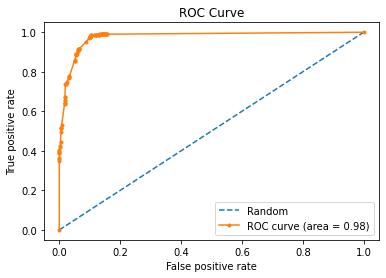

In [1207]:

fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot Random guess
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker = ".", label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
# show the plot
plt.show()
